<h1><strong>Investigate Hotel Business using Data Visualization</strong></h1>

<p>
    Created by : <strong>Faisal Adam Yudithia</strong> (<a href="https://linktr.ee/faisalydth">Personal Details</a>)
</p>

In [1]:
# import library
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data Preprocessing</h2>

In [2]:
# load dataset
# df = pd.read_csv('__dataset/hotel_bookings_data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/faisalydth/investigate-hotel/main/__dataset/hotel_bookings_data.csv')
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out


In [3]:
# backup data
df_raw = df.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# descriptive statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2018.156554,0.707476,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_date_month,119390,12,October,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_weekdays_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


<h3>Handling Missing Data</h3>

In [6]:
# missing data checking
missing_data = df.isna().sum().to_frame().rename({0:'missing_cnt'}, axis=1)
missing_data = missing_data.loc[missing_data['missing_cnt']>0]
missing_data['missing_pct'] = missing_data['missing_cnt']/len(df)*100
missing_data = missing_data.join(df.dtypes.to_frame().rename({0:'dtype'}, axis=1), how='left')
missing_data

,missing_cnt,missing_pct,dtype
children,4,0.003350,float64
city,488,0.408744,object
agent,16340,13.686238,float64
company,112593,94.306893,float64


<p><strong>Drop the company column is the best choice because more than 90% data is null.</strong></p>

In [7]:
df = df.drop(['company'], axis=1)

<p><strong>Child column is continuous data, fill null with median.</strong></p>

In [8]:
df['children'] = df['children'].fillna(df['children'].median())

<p><strong>City and agent columns is discrete data, fill null with mode.</strong></p>

In [9]:
df['city'] = df['city'].fillna(df['city'].mode().values[0])
df['agent'] = df['agent'].fillna(df['agent'].mode().values[0])

In [10]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [11]:
# unique data checking for string columns
obj_cols = df.dtypes.to_frame().loc[df.dtypes.to_frame()[0]=='object'].index.to_list()
for col in obj_cols:
    print(col.upper())
    print(df[col].unique(), end='\n\n')

HOTEL
['Resort Hotel' 'City Hotel']

ARRIVAL_DATE_MONTH
['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']

MEAL
['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']

CITY
['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' 'Kabupaten Tangerang' 'Kota Semarang'
 'Kota Serang' 'Kota Tangerang' 'Kota Bogor' 'Kabupaten Bandung'
 'Kabupaten Magelang' 'Kabupaten Sumedang' 'Kota Jakarta Timur'
 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu' 'Kabupaten Belitung'
 'Kota Jakarta Pusat' 'Kota Jakarta Selatan' 'Kota Surabaya'
 'Kota Jakarta Utara' 'Kota Gorontalo' 'Kota Jambi' 'Kota Jakarta Barat'
 'Kota Bengkulu' 'Kabupaten Bandung Barat' 'Kabupaten Bekasi'
 'Kabupaten Bogor' 'Kabupaten Ciamis' 'Kabupaten Cianjur'
 'Kabupaten Cirebon' 'Kota Cimahi' 'Kabupaten Indramayu'
 'Kabupaten Karawang' 'Kabupaten Kuningan' 'Kabupaten Majalengka'
 'Kabupaten Serang' 'Kota Pangkal Pinang' '

<p>
    <strong>There are undefined value in meal and distribution_channel columns.</strong><br>
    Let's check by counting their values.
</p>

In [12]:
meal_cnt = df['meal'].value_counts().to_frame().rename({'meal':'count'}, axis=1)
meal_pct = df['meal'].value_counts(normalize=True).to_frame().rename({'meal':'percentage'}, axis=1)
meal_cnt.join(meal_pct, how='inner')

,count,percentage
Breakfast,92310,0.773180
Dinner,14463,0.121141
No Meal,10650,0.089203
Undefined,1169,0.009791
Full Board,798,0.006684


In [13]:
distribution_channel_cnt = df['distribution_channel'].value_counts().to_frame().rename({'distribution_channel':'count'}, axis=1)
distribution_channel_pct = df['distribution_channel'].value_counts(normalize=True).to_frame().rename({'distribution_channel':'percentage'}, axis=1)
distribution_channel_cnt.join(distribution_channel_pct, how='inner')

,count,percentage
TA/TO,97870,0.819750
Direct,14645,0.122665
Corporate,6677,0.055926
GDS,193,0.001617
Undefined,5,0.000042


<p><strong>Fill undefined value with mode.</strong></p>

In [14]:
mode_value = df['meal'].mode().values[0]
df['meal'] = df['meal'].transform(lambda x: mode_value if x == 'Undefined' else x)

In [15]:
mode_value = df['distribution_channel'].mode().values[0]
df['distribution_channel'] = df['distribution_channel'].transform(lambda x: mode_value if x == 'Undefined' else x)

In [16]:
 df['meal'].value_counts(normalize=True)

Breakfast     0.782972
Dinner        0.121141
No Meal       0.089203
Full Board    0.006684
Name: meal, dtype: float64

In [17]:
 df['distribution_channel'].value_counts(normalize=True)

TA/TO        0.819792
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Name: distribution_channel, dtype: float64

<h3>Handling Duplicated Data</h3>

In [18]:
len(df) # before

119390

In [19]:
df.duplicated().sum()

33295

In [20]:
df = df.drop_duplicates()

In [21]:
len(df) # after

86095

<h2>Monthly Hotel Booking Analysis Based on Hotel Type</h2>

1. Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan data tahun kedatangan)
2. Lakukan normalisasi data (Hint: Perhatikan data bulan September dan Oktober)
3. Urutkan data berdasarkan bulan (Hint: Perhatikan penulisan nama bulan untuk mempermudah visualisasi)
4. Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)
5. Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya (Hint: Perhatikan hari libur di Indonesia)

In [22]:
# create list of arrival year
arr_year = df['arrival_date_year'].unique()
arr_year

array([2017, 2018, 2019], dtype=int64)

In [23]:
# create list of arrival month
arr_month = df['arrival_date_month'].unique()
arr_month

array(['September', 'October', 'November', 'December', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August'],
      dtype=object)

In [24]:
# cross year and month
cross_ym = []
for year in arr_year:
    for month in arr_month:
        data = [year, month]
        cross_ym.append(data)

monthly_series = pd.DataFrame(cross_ym).rename({0:'year', 1:'month'}, axis=1)
monthly_series['year_month'] = pd.to_datetime(monthly_series['year'].astype(str) + monthly_series['month'], format='%Y%B')
monthly_series = monthly_series.sort_values(['year_month']).reset_index(drop=True)
monthly_series

,year,month,year_month
0,2017,January,2017-01-01
1,2017,February,2017-02-01
2,2017,March,2017-03-01
3,2017,April,2017-04-01
4,2017,May,2017-05-01
5,2017,June,2017-06-01
6,2017,July,2017-07-01
7,2017,August,2017-08-01
8,2017,September,2017-09-01
9,2017,October,2017-10-01


In [25]:
monthly_book = df.groupby(['arrival_date_year', 'arrival_date_month', 'hotel']).agg({'hotel':'count'})
monthly_book = monthly_book.rename({'hotel':'customer'}, axis=1)
monthly_book = monthly_book.reset_index()
monthly_book = monthly_book.rename({'arrival_date_year':'year', 'arrival_date_month':'month', 'hotel':'type'}, axis=1)
monthly_book

,year,month,type,customer
0,2017,December,City Hotel,1457
1,2017,December,Resort Hotel,1110
2,2017,February,City Hotel,1003
3,2017,February,Resort Hotel,948
4,2017,January,City Hotel,763
5,2017,January,Resort Hotel,845
6,2017,November,City Hotel,1544
7,2017,November,Resort Hotel,1135
8,2017,October,City Hotel,1060
9,2017,October,Resort Hotel,1344


In [26]:
monthly_book_all = monthly_series.merge(monthly_book, on=['year', 'month'], how='left')
monthly_book_all['type'] = monthly_book_all['type'].fillna('City Hotel')
monthly_book_all['customer'] = monthly_book_all['customer'].fillna(0)
monthly_book_all

,year,month,year_month,type,customer
0,2017,January,2017-01-01,City Hotel,763.0
1,2017,January,2017-01-01,Resort Hotel,845.0
2,2017,February,2017-02-01,City Hotel,1003.0
3,2017,February,2017-02-01,Resort Hotel,948.0
4,2017,March,2017-03-01,City Hotel,0.0
...,...,...,...,...,...
57,2019,September,2019-09-01,Resort Hotel,1664.0
58,2019,October,2019-10-01,City Hotel,2653.0
59,2019,October,2019-10-01,Resort Hotel,1705.0
60,2019,November,2019-11-01,City Hotel,0.0


In [27]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

C:\Users\first\AppData\Local\Temp\ipykernel_12788\4270814374.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


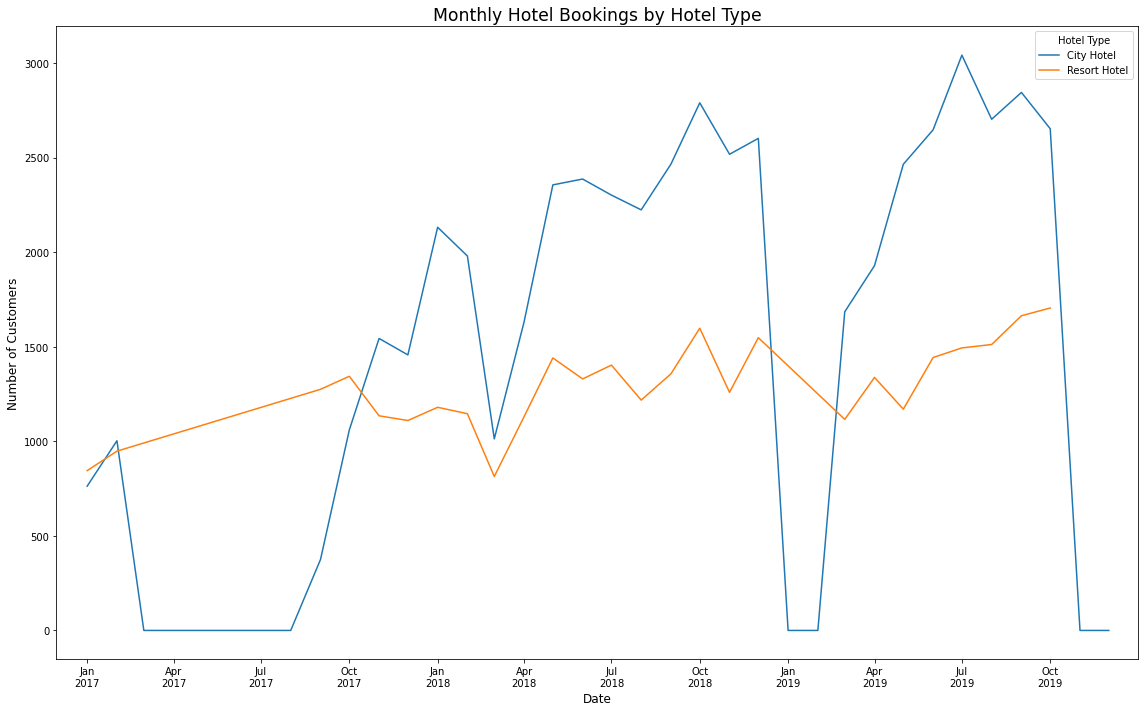

In [28]:
fig, ax = plt.subplots(figsize=(16,10))

sns.lineplot(data=monthly_book_all, x='year_month', y='customer', hue='type', ax=ax)

plt.title("Monthly Hotel Bookings by Hotel Type", size='xx-large')
plt.xlabel("Date", size='large')
plt.ylabel("Number of Customers", size='large')
plt.legend(title="Hotel Type")

ax.set_xlim('2016-11-30', '2019-12-31')
date_form = DateFormatter("%b\n%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

fig.tight_layout()
fig.show()

<h2>Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates</h2>

In [29]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
71982,City Hotel,1,22,2019,September,29,17,1,1,2,0.0,0,No Meal,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,140.00,0,0,Canceled
114265,City Hotel,0,133,2019,August,24,12,2,5,2,0.0,0,Breakfast,Kota Blitar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,132.43,0,0,Check-Out
68950,City Hotel,1,147,2019,July,21,23,0,4,2,0.0,0,Breakfast,Kabupaten Magelang,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,139.50,0,1,Canceled
55564,City Hotel,1,55,2018,October,34,16,0,3,2,0.0,0,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,2,No Deposit,9.0,0,Personal,149.40,0,0,Canceled
102477,City Hotel,0,17,2018,January,49,27,2,1,1,0.0,0,No Meal,Kabupaten Bandung,Online TA,GDS,0,0,0,0,No Deposit,195.0,0,Personal,78.00,0,0,Check-Out


In [30]:
stay_duration = df[['hotel', 'is_canceled', 'stays_in_weekend_nights', 'stays_in_weekdays_nights']].copy()
stay_duration['total_stays_in_nights'] = stay_duration['stays_in_weekend_nights'] + stay_duration['stays_in_weekdays_nights']
stay_duration

,hotel,is_canceled,stays_in_weekend_nights,stays_in_weekdays_nights,total_stays_in_nights
0,Resort Hotel,0,0,0,0
1,Resort Hotel,0,0,0,0
2,Resort Hotel,0,0,1,1
3,Resort Hotel,0,0,1,1
4,Resort Hotel,0,0,2,2
...,...,...,...,...,...
119385,City Hotel,0,2,5,7
119386,City Hotel,0,2,5,7
119387,City Hotel,0,2,5,7
119388,City Hotel,0,2,5,7


In [31]:
stay_duration.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86095.0,0.275672,0.446855,0.0,0.0,0.0,1.0,1.0
stays_in_weekend_nights,86095.0,1.010001,1.033475,0.0,0.0,1.0,2.0,19.0
stays_in_weekdays_nights,86095.0,2.633777,2.058456,0.0,1.0,2.0,4.0,50.0
total_stays_in_nights,86095.0,3.643777,2.770405,0.0,2.0,3.0,5.0,69.0


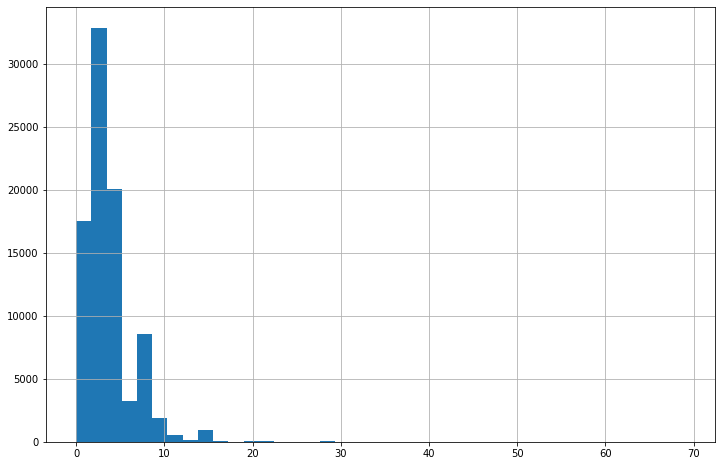

In [32]:
plt.figure(figsize=(12,8))
stay_duration['total_stays_in_nights'].hist(bins=40)
plt.show()

In [33]:
stay_duration['total_stays_class'] = np.where(stay_duration['total_stays_in_nights'] < 3, '< 3 nights',
                                              np.where((stay_duration['total_stays_in_nights'] >= 3) & (stay_duration['total_stays_in_nights'] < 6), '3 – 5 nights',
                                                       np.where((stay_duration['total_stays_in_nights'] >= 6) & (stay_duration['total_stays_in_nights'] < 10), '6 – 9 nights', '> 10 nights')))
stay_duration

,hotel,is_canceled,stays_in_weekend_nights,stays_in_weekdays_nights,total_stays_in_nights,total_stays_class
0,Resort Hotel,0,0,0,0,< 3 nights
1,Resort Hotel,0,0,0,0,< 3 nights
2,Resort Hotel,0,0,1,1,< 3 nights
3,Resort Hotel,0,0,1,1,< 3 nights
4,Resort Hotel,0,0,2,2,< 3 nights
...,...,...,...,...,...,...
119385,City Hotel,0,2,5,7,6 – 9 nights
119386,City Hotel,0,2,5,7,6 – 9 nights
119387,City Hotel,0,2,5,7,6 – 9 nights
119388,City Hotel,0,2,5,7,6 – 9 nights


In [34]:
stay_duration_canceled = stay_duration.groupby(['hotel', 'total_stays_class', 'is_canceled']).size().reset_index().rename({0:'count'}, axis=1)
stay_duration_canceled['count_class'] = stay_duration_canceled.groupby(['hotel', 'total_stays_class'])['count'].transform('sum')
stay_duration_canceled['percentage'] = stay_duration_canceled['count'] / stay_duration_canceled['count_class']
stay_duration_canceled = stay_duration_canceled.loc[stay_duration_canceled['is_canceled'] == 1]
stay_duration_canceled = stay_duration_canceled.drop(['count_class', 'is_canceled'], axis=1)
stay_duration_canceled['order'] = stay_duration_canceled['total_stays_class'].map({'< 3 nights':1, '3 – 5 nights':2, '6 – 9 nights':3, '> 10 nights':4})
stay_duration_canceled = stay_duration_canceled.sort_values(['order']).reset_index(drop=True)
stay_duration_canceled

,hotel,total_stays_class,count,percentage,order
0,City Hotel,< 3 nights,5411,0.258689,1
1,Resort Hotel,< 3 nights,1860,0.155440,1
2,City Hotel,3 – 5 nights,8503,0.315019,2
3,Resort Hotel,3 – 5 nights,2905,0.272924,2
4,City Hotel,6 – 9 nights,1557,0.384825,3
5,Resort Hotel,6 – 9 nights,2521,0.295718,3
6,City Hotel,> 10 nights,383,0.620746,4
7,Resort Hotel,> 10 nights,594,0.248744,4


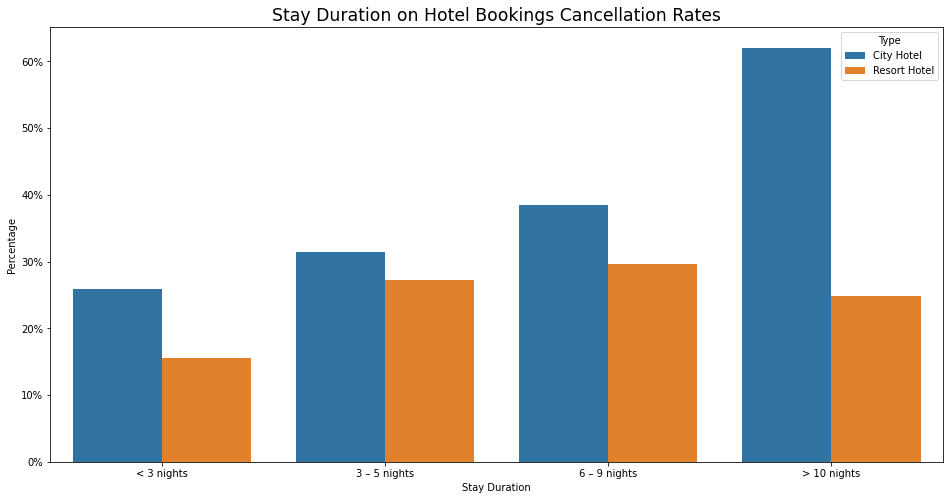

In [35]:
plt.subplots(figsize = (16, 8))

plot_city = stay_duration_canceled.loc[stay_duration_canceled['hotel'] == 'City Hotel']
plot_resort = stay_duration_canceled.loc[stay_duration_canceled['hotel'] == 'Resort  Hotel']

# ax.bar(plot_city['total_stays_class'], plot_city['percentage'], width=0.4, align='edge', color='#ff99cc', label='City Hotel')
# ax.bar(plot_resort['total_stays_class'], plot_resort['percentage'], width=0.4, align='center', color='#ccccff', label='Resort Hotel')
sns.barplot(data=stay_duration_canceled, x='total_stays_class', y='percentage', hue='hotel')
plt.xlabel('Stay Duration')
plt.ylabel('Percentage')
yticks = list(np.arange(0, 0.7, 0.1))
yticks_pct = []
for i in yticks:
    x = "{:.0%}".format(i)
    yticks_pct.append(x)
plt.yticks(yticks, yticks_pct)
plt.legend(title='Type')
plt.title('Stay Duration on Hotel Bookings Cancellation Rates', size='xx-large')

plt.show()

<h2>Impact Analysis of Lead Time on Hotel Bookings Cancellation Rates</h2>

In [47]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
10472,Resort Hotel,1,146,2019,May,10,9,0,3,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,67.0,60,Personal,46.00,0,0,Canceled
104512,City Hotel,0,0,2019,March,2,13,0,2,2,2.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,174.00,0,0,Check-Out
30878,Resort Hotel,0,14,2018,February,50,5,1,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,134.0,0,Family,84.00,0,0,Check-Out
77840,City Hotel,0,16,2017,November,39,25,2,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1.0,0,Family,180.00,0,0,Check-Out
1896,Resort Hotel,0,86,2017,November,39,20,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,40.0,0,Personal,74.93,0,0,Check-Out


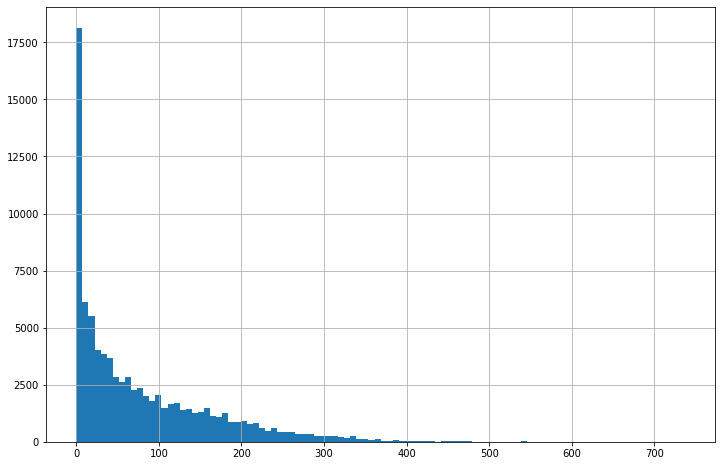

In [40]:
plt.figure(figsize=(12,8))
df['lead_time'].hist(bins=100)
plt.show()

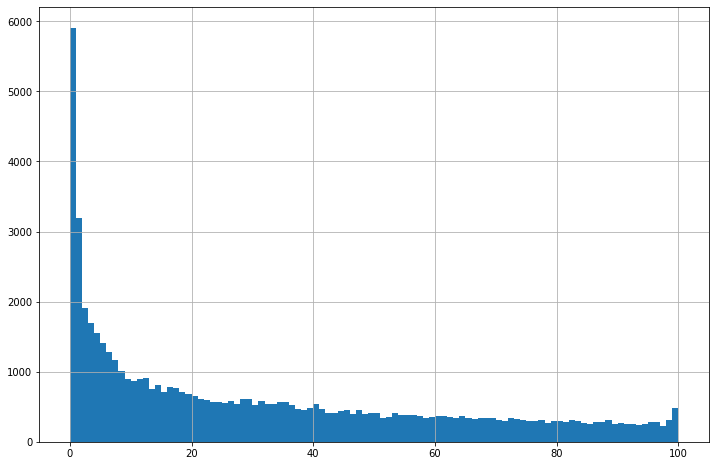

In [52]:
plt.figure(figsize=(12,8))
df['lead_time'].loc[df['lead_time'] <= 100].hist(bins=100)
plt.show()

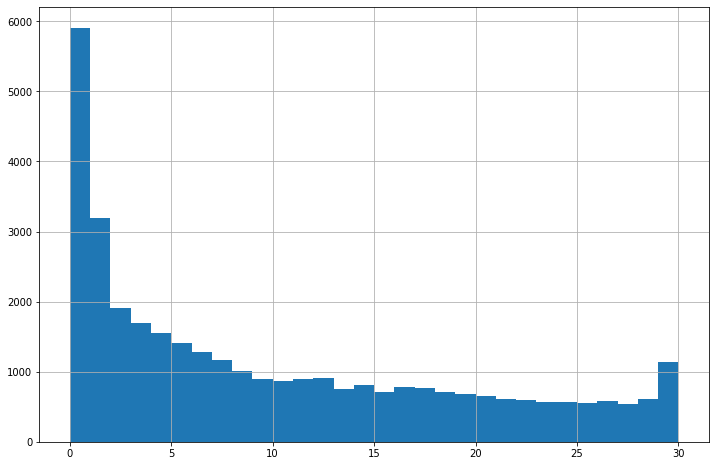

In [53]:
plt.figure(figsize=(12,8))
df['lead_time'].loc[df['lead_time'] <= 30].hist(bins=30)
plt.show()

In [54]:
lead_time = df[['hotel', 'is_canceled', 'lead_time']].copy()
lead_time['lead_time_class'] = np.where(lead_time['lead_time'] < 7, '< 1 week',
                                              np.where((lead_time['lead_time'] >= 7) & (lead_time['lead_time'] < 31), '1 – 4 weeks',
                                                       np.where((lead_time['lead_time'] >= 31) & (lead_time['lead_time'] < 91), '1 – 3 months',
                                                                np.where((lead_time['lead_time'] >= 91) & (lead_time['lead_time'] < 366), '4 – 12 months', '> 1 year'))))
lead_time

,hotel,is_canceled,lead_time,lead_time_class
0,Resort Hotel,0,342,4 – 12 months
1,Resort Hotel,0,737,> 1 year
2,Resort Hotel,0,7,1 – 4 weeks
3,Resort Hotel,0,13,1 – 4 weeks
4,Resort Hotel,0,14,1 – 4 weeks
...,...,...,...,...
119385,City Hotel,0,23,1 – 4 weeks
119386,City Hotel,0,102,4 – 12 months
119387,City Hotel,0,34,1 – 3 months
119388,City Hotel,0,109,4 – 12 months


In [55]:
lead_time_canceled = lead_time.groupby(['hotel', 'lead_time_class', 'is_canceled']).size().reset_index().rename({0:'count'}, axis=1)
lead_time_canceled['count_class'] = lead_time_canceled.groupby(['hotel', 'lead_time_class'])['count'].transform('sum')
lead_time_canceled['percentage'] = lead_time_canceled['count'] / lead_time_canceled['count_class']
lead_time_canceled = lead_time_canceled.loc[lead_time_canceled['is_canceled'] == 1]
lead_time_canceled = lead_time_canceled.drop(['count_class', 'is_canceled'], axis=1)
lead_time_canceled['order'] = lead_time_canceled['lead_time_class'].map({'< 1 week':1, '1 – 4 weeks':2, '1 – 3 months':3, '4 – 12 months':4, '> 1 year':5})
lead_time_canceled = lead_time_canceled.sort_values(['order']).reset_index(drop=True)
lead_time_canceled

,hotel,lead_time_class,count,percentage,order
0,City Hotel,< 1 week,925,0.101392,1
1,Resort Hotel,< 1 week,456,0.058126,1
2,City Hotel,1 – 4 weeks,3021,0.271599,2
3,Resort Hotel,1 – 4 weeks,1243,0.199167,2
4,City Hotel,1 – 3 months,4975,0.333736,3
5,Resort Hotel,1 – 3 months,2220,0.296672,3
6,City Hotel,4 – 12 months,6745,0.395277,4
7,Resort Hotel,4 – 12 months,3924,0.333079,4
8,City Hotel,> 1 year,188,0.529577,5
9,Resort Hotel,> 1 year,37,0.213873,5


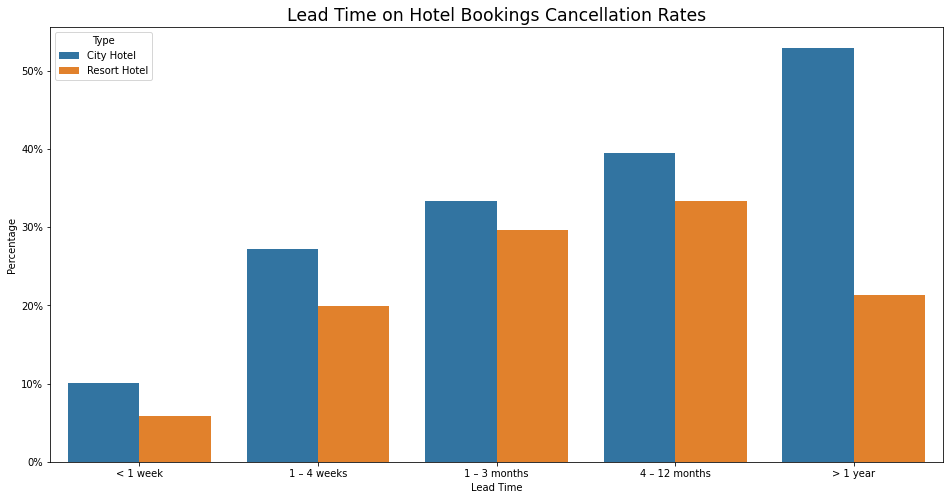

In [57]:
plt.subplots(figsize = (16, 8))

plot_city = lead_time_canceled.loc[lead_time_canceled['hotel'] == 'City Hotel']
plot_resort = lead_time_canceled.loc[lead_time_canceled['hotel'] == 'Resort  Hotel']

# ax.bar(plot_city['lead_time_class'], plot_city['percentage'], width=0.4, align='edge', color='#ff99cc', label='City Hotel')
# ax.bar(plot_resort['lead_time_class'], plot_resort['percentage'], width=0.4, align='center', color='#ccccff', label='Resort Hotel')
sns.barplot(data=lead_time_canceled, x='lead_time_class', y='percentage', hue='hotel')
plt.xlabel('Lead Time')
plt.ylabel('Percentage')
yticks = list(np.arange(0, 0.6, 0.1))
yticks_pct = []
for i in yticks:
    x = "{:.0%}".format(i)
    yticks_pct.append(x)
plt.yticks(yticks, yticks_pct)
plt.legend(title='Type')
plt.title('Lead Time on Hotel Bookings Cancellation Rates', size='xx-large')

plt.show()